In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
csv_output_file = '/home/ubuntu/gridmet_test_run/test_data_predicted.csv'
csv_WUSUCLAswe_file = '/home/ubuntu/gridmet_test_run/SWE_testingCells_2017and2018.csv'

In [3]:
df1 = pd.read_csv(csv_output_file)
df2_filtered = df2[df2['date'] ==  '2018-04-15']

df2 = pd.read_csv(csv_WUSUCLAswe_file)
df2_filtered = df2[df2['date'] ==  '2018-04-15']
df2_filtered

/tmp/ipykernel_115026/2958583742.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(csv_WUSUCLAswe_file)


,date,lat,lon,SWE
367696,2018-04-15,38.740,-119.744,0.0
367697,2018-04-15,38.740,-119.708,0.0
367698,2018-04-15,38.740,-119.672,0.0018
367699,2018-04-15,38.740,-119.636,0.0188
367700,2018-04-15,38.740,-119.600,0.0
...,...,...,...,...
368475,2018-04-15,37.768,-118.916,0.0014
368476,2018-04-15,37.768,-118.880,0.0
368477,2018-04-15,37.768,-118.844,0.0
368478,2018-04-15,37.768,-118.808,0.0


In [4]:
def spatial_fig(lat,lon,plotvals,uplim,lowlim,mapr,lonlims,latlims):
    fg,ax = plt.subplots(figsize=(6,5))
    if uplim:
        out = ax.scatter(lon,lat,120,c=plotvals,marker='s',vmin=uplim,vmax=lowlim,cmap=mapr)
    else:
        out = ax.scatter(lon,lat,120,c=plotvals,marker='s',cmap=mapr)
    
    ax.set_xlim(lonlims)
    ax.set_ylim(latlims)
    ax.set_facecolor([0.5,0.5,0.5])
    fg.colorbar(out)
    ax.set_xlabel('Longitude [deg]')
    ax.set_ylabel('Latitude [deg]')

    return None 

In [ ]:
lat = df2_filtered['lat']
lon = df2_filtered['lon']
latlims = [np.min(lat),np.max(lat)]
lonlims = [np.min(lon),np.max(lon)]
spatial_fig(lat,lon,df2_filtered['SWE'].astype(float),1.3,0,'Blues',
            lonlims,latlims)

lat = df1['lat']
lon = df1['lon']
spatial_fig(lat,lon,df1['predicted_swe']*0.0254,1.3,0,'Blues',
           lonlims,latlims)

In [45]:
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(df1[['lat', 'lon']])
distances, indices = nbrs.kneighbors(df2_filtered[['lat', 'lon']])

In [46]:
df2_filtered['predicted_swe'] = df1.loc[indices.flatten(), 'predicted_swe'].values.astype(float)
df2_filtered['distances'] = distances.flatten()
df2_filtered

/tmp/ipykernel_111967/1108868367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['predicted_swe'] = df1.loc[indices.flatten(), 'predicted_swe'].values.astype(float)
/tmp/ipykernel_111967/1108868367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['distances'] = distances.flatten()


,date,lat,lon,SWE,predicted_swe,distances
367696,2018-04-15,38.740,-119.744,0.0,8.694,0.0
367697,2018-04-15,38.740,-119.708,0.0,7.608,0.0
367698,2018-04-15,38.740,-119.672,0.0018,8.331,0.0
367699,2018-04-15,38.740,-119.636,0.0188,8.479,0.0
367700,2018-04-15,38.740,-119.600,0.0,8.195,0.0
...,...,...,...,...,...,...
368475,2018-04-15,37.768,-118.916,0.0014,8.208,0.0
368476,2018-04-15,37.768,-118.880,0.0,6.690,0.0
368477,2018-04-15,37.768,-118.844,0.0,6.609,0.0
368478,2018-04-15,37.768,-118.808,0.0,6.467,0.0


mse =  0.056
mean pbias =  10369.501
r =  0.298


/tmp/ipykernel_111967/1700627379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['sweErr'] = x-y


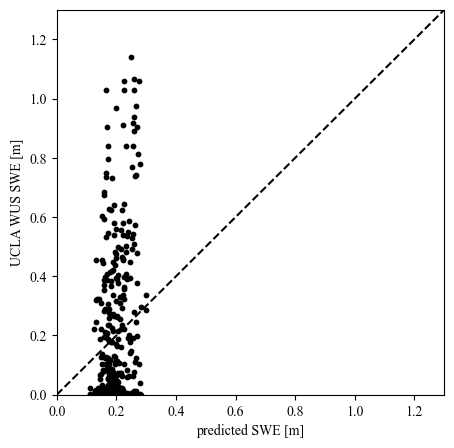

In [67]:
x = df2_filtered['predicted_swe']*0.0254
y = df2_filtered['SWE'].astype(float)
df2_filtered['sweErr'] = x-y

fg,ax = plt.subplots(figsize=(5,5))
ax.scatter(x,y,10,c='k')
ax.plot([0,1.3],[0,1.3],'--k')
ax.set_ylabel('UCLA WUS SWE [m]')
ax.set_xlabel('predicted SWE [m]')
ax.set_xlim([0,1.3])
ax.set_ylim([0,1.3])

def roundr(val):
    val  = np.round(val * 1000)
    val = val/1000
    return val
    
print('mse = ',roundr(np.mean((x-y)**2)))
y_temp = y.copy()
y_temp[y_temp == 0] = np.nan
print('mean pbias = ',roundr(np.mean((x-y_temp)/y_temp)*100))
r = np.corrcoef(x,y)
print('r = ',roundr(r[0,1]))


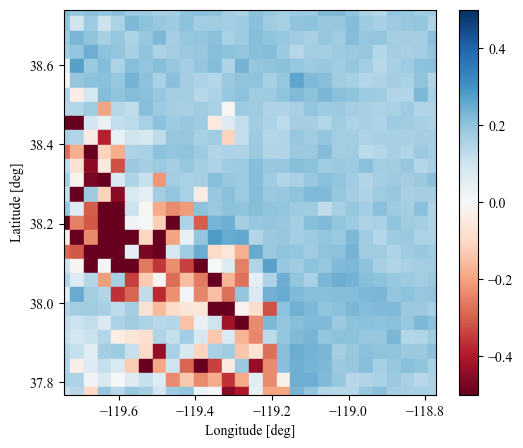

In [69]:
lat = df2_filtered['lat']
lon = df2_filtered['lon']
spatial_fig(lat,lon,df2_filtered['sweErr'],-0.5,0.5,'RdBu',
           lonlims,latlims)

/tmp/ipykernel_111967/2070012428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['holder'] = df1.loc[indices.flatten(),varr].values.astype(float)


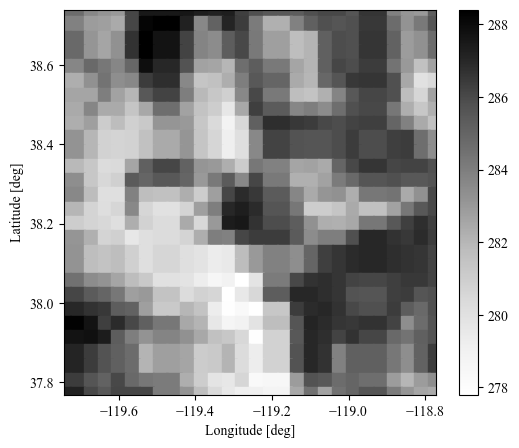

In [97]:
varr = 'air_temperature_tmmx'#'relative_humidity_rmax'#'mean_vapor_pressure_deficit'#'potential_evapotranspiration'#'air_temperature_tmmn'
df2_filtered['holder'] = df1.loc[indices.flatten(),varr].values.astype(float)


lat = df2_filtered['lat']
lon = df2_filtered['lon']
spatial_fig(lat,lon,df2_filtered['holder'],[],[],'Greys',
           lonlims,latlims)

In [92]:
df1

,date,lat,lon,SWE,Flag,air_temperature_tmmn,potential_evapotranspiration,mean_vapor_pressure_deficit,relative_humidity_rmax,relative_humidity_rmin,precipitation_amount,air_temperature_tmmx,wind_speed,elevation,slope,curvature,aspect,eastness,northness,predicted_swe
0,2018-01-01,49.00,-125.000,0,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.393
1,2018-01-01,49.00,-124.964,0,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.393
2,2018-01-01,49.00,-124.928,0,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.393
3,2018-01-01,49.00,-124.892,0,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.393
4,2018-01-01,49.00,-124.856,0,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462199,2018-01-01,25.06,-100.196,252,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.877
462200,2018-01-01,25.06,-100.160,252,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.877
462201,2018-01-01,25.06,-100.124,252,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.877
462202,2018-01-01,25.06,-100.088,252,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.877


## All scatch scripting from here

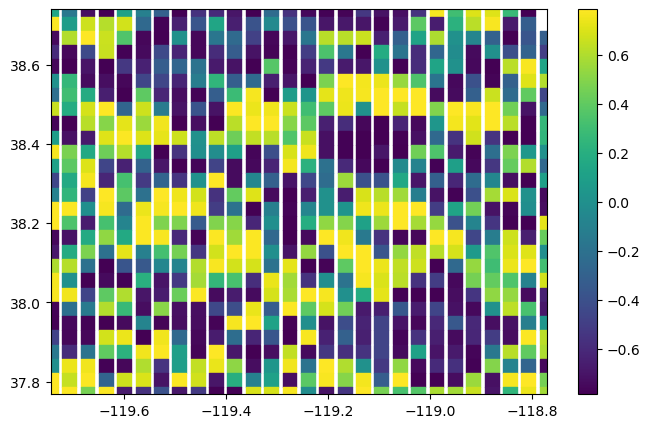

In [137]:
varbl = 'northness'
fg,ax = plt.subplots(figsize=(8,5))
out = ax.scatter(df1['lon'],df1['lat'],100,c=df1[varbl],marker='s')
ax.set_xlim([np.min(df2_filtered['lon']),np.max(df2_filtered['lon'])])
ax.set_ylim([np.min(df2_filtered['lat']),np.max(df2_filtered['lat'])])
fg.colorbar(out)

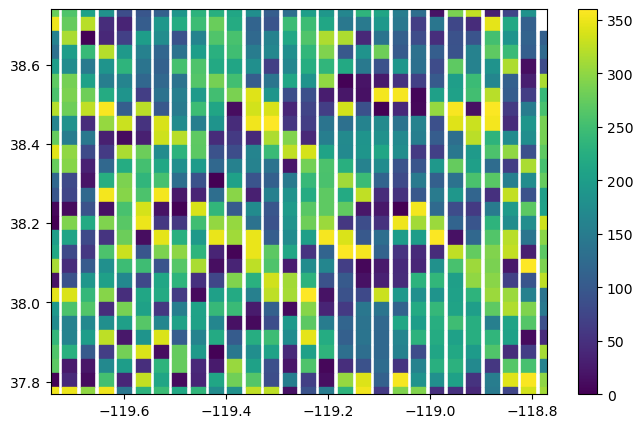

In [141]:
varbl = 'aspect'
fg,ax = plt.subplots(figsize=(8,5))
out = ax.scatter(df1['lon'],df1['lat'],100,c=df1[varbl],marker='s')
ax.set_xlim([np.min(df2_filtered['lon']),np.max(df2_filtered['lon'])])
ax.set_ylim([np.min(df2_filtered['lat']),np.max(df2_filtered['lat'])])
fg.colorbar(out)

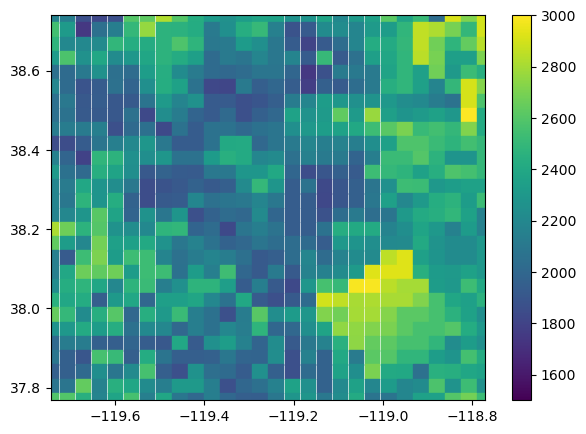

In [143]:
varbl = 'elevation'
fg,ax = plt.subplots(figsize=(7,5))
out = ax.scatter(df1['lon'],df1['lat'],110,c=df1[varbl],marker='s',vmin=1500,vmax=3000)
ax.set_xlim([np.min(df2_filtered['lon']),np.max(df2_filtered['lon'])])
ax.set_ylim([np.min(df2_filtered['lat']),np.max(df2_filtered['lat'])])
fg.colorbar(out)

In [145]:
print([np.min(df2_filtered['lon']),np.max(df2_filtered['lon'])])
print([np.min(df2_filtered['lat']),np.max(df2_filtered['lat'])])


[-119.744, -118.772]
[37.768, 38.74]


In [140]:
df1

,date,lat,lon,SWE,Flag,air_temperature_tmmn,potential_evapotranspiration,mean_vapor_pressure_deficit,relative_humidity_rmax,relative_humidity_rmin,precipitation_amount,air_temperature_tmmx,wind_speed,elevation,slope,curvature,aspect,eastness,northness,predicted_swe
0,2018-01-01,49.00,-125.000,0,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.393
1,2018-01-01,49.00,-124.964,0,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.393
2,2018-01-01,49.00,-124.928,0,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.393
3,2018-01-01,49.00,-124.892,0,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.393
4,2018-01-01,49.00,-124.856,0,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462199,2018-01-01,25.06,-100.196,252,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.877
462200,2018-01-01,25.06,-100.160,252,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.877
462201,2018-01-01,25.06,-100.124,252,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.877
462202,2018-01-01,25.06,-100.088,252,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.877


In [44]:
df2_filtered

,date,lat,lon,SWE
310464,2018-02-01,38.740,-119.744,0.0
310465,2018-02-01,38.740,-119.708,0.0
310466,2018-02-01,38.740,-119.672,0.0006
310467,2018-02-01,38.740,-119.636,0.0008
310468,2018-02-01,38.740,-119.600,0.0
...,...,...,...,...
311243,2018-02-01,37.768,-118.916,0.0
311244,2018-02-01,37.768,-118.880,0.0
311245,2018-02-01,37.768,-118.844,0.0
311246,2018-02-01,37.768,-118.808,0.0


In [4]:
# # Define a function to find the nearest SWE value from df2 for each row in df1
# def find_nearest_swe(row):
#     distances = cdist(df1[['lat', 'lon']], df2[['lat', 'lon']], metric='euclidean')
#     nearest_index = np.argmin(distances[row.name])
#     nearest_swe = df2.at[nearest_index, 'SWE2']
#     return nearest_swe

In [7]:
df1['nearest_swe'] = df1.apply(find_nearest_swe, axis=1)


MemoryError: Unable to allocate 1.92 TiB for an array with shape (462204, 572320) and data type float64

In [84]:
# Pivot the DataFrame to create a multi-dimensional structure
df_pivoted = df1.pivot(index='lat', columns='lon', values=['SWE'])
# Reset the index to get lat and lon as regular columns
df_pivoted = df_pivoted.reset_index()

In [76]:
df_pivoted.columns.levels[1][:-1]

Index([  -125.0, -124.964, -124.928, -124.892, -124.856,  -124.82, -124.784,
       -124.748, -124.712, -124.676,
       ...
       -100.376,  -100.34, -100.304, -100.268, -100.232, -100.196,  -100.16,
       -100.124, -100.088, -100.052],
      dtype='object', name='lon', length=694)

In [78]:
# Pivot the DataFrame to create a multi-dimensional structure
df_pivoted = df1.pivot(index='lat', columns='lon', values=['SWE'])
# Reset the index to get lat and lon as regular columns
df_pivoted = df_pivoted.reset_index()

In [87]:
# Define the coordinates and data variables
latitudes = df_pivoted['lat']
longitudes = df_pivoted.columns.levels[1]
data_variables = df_pivoted.values

# Create a DataArray
xarray_data = xr.DataArray(data_variables,  # Exclude lat and lon columns
                           coords=[('lat', latitudes), ('lon', longitudes)],
                           dims=['lat', 'lon'],
                           name='SWE')

In [89]:
xarray_data['lon']#['lon'].astype(float)

<xarray.DataArray 'lon' (lon: 695)>
array([-125.0, -124.964, -124.928, ..., -100.088, -100.052, ''], dtype=object)
Coordinates:
  * lon      (lon) object -125.0 -124.964 -124.928 ... -100.088 -100.052 ''

In [19]:
# Define the coordinates and data variables
latitudes = df1['lat'].values
longitudes = df1['lon'].values
data_variables = df1['SWE']

# Create a DataArray
xarray_data = xr.DataArray(data_variables,  # Exclude lat and lon columns
                           coords=[('lat', latitudes), ('lon', longitudes)],
                           dims=['lat', 'lon'],
                           name=data_variables)

ValueError: coords is not dict-like, but it has 2 items, which does not match the 1 dimensions of the data

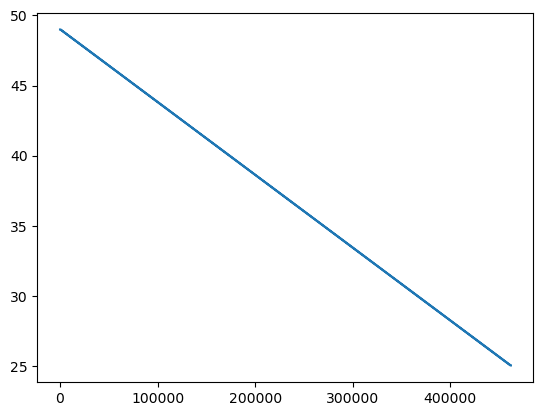

In [23]:
plt.plot(latitudes)

In [6]:
# def find_nearest(df1, df2):
#     latlon1 = np.radians(df1[['lat', 'lon']].values)
#     latlon2 = np.radians(df2[['lat', 'lon']].values)

#     # Calculate the distances between coordinates using Haversine formula
#     distances = cdist(latlon1, latlon2, metric='haversine')

#     # Find the index of the nearest point in df2 for each point in df1
#     nearest_idx = distances.argmin(axis=1)

#     # Create a new DataFrame containing the corresponding values from df2
#     nearest_values = df2.iloc[nearest_idx]

#     # Reset the index to match with df1
#     nearest_values.reset_index(drop=True, inplace=True)

#     return nearest_values

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Calculate the distance
    distance = R * c
    return distance

In [11]:
# Initialize the nearest value column in df1
df1['nearest_value_col'] = None

# Iterate over rows in df1 and find the nearest point in df2
for index1, row1 in df1.iterrows():
    min_distance = float('inf')
    nearest_value = None
    for index2, row2 in df2.iterrows():
        distance = haversine(row1['lat'], row1['lon'], row2['lat'], row2['lon'])
        if distance < min_distance:
            min_distance = distance
            nearest_value = row2['SWE']
        break
    break
    df1.at[index1, 'nearest_value_col'] = nearest_value

print(df1)

        date    lat      lon  SWE  Flag  air_temperature_tmmn  \
0          1  49.00 -125.000    0   241                   NaN   
1          1  49.00 -124.964    0   241                   NaN   
2          1  49.00 -124.928    0   241                   NaN   
3          1  49.00 -124.892    0   241                   NaN   
4          1  49.00 -124.856    0   241                   NaN   
...      ...    ...      ...  ...   ...                   ...   
462199     1  25.06 -100.196  252   252                   NaN   
462200     1  25.06 -100.160  252   252                   NaN   
462201     1  25.06 -100.124  252   252                   NaN   
462202     1  25.06 -100.088  252   252                   NaN   
462203     1  25.06 -100.052  252   252                   NaN   

        potential_evapotranspiration  mean_vapor_pressure_deficit  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2           

In [12]:
index

NameError: name 'index' is not defined

In [ ]:
nearest

In [18]:
grouped = data.groupby(['lat', 'lon'])
grouped

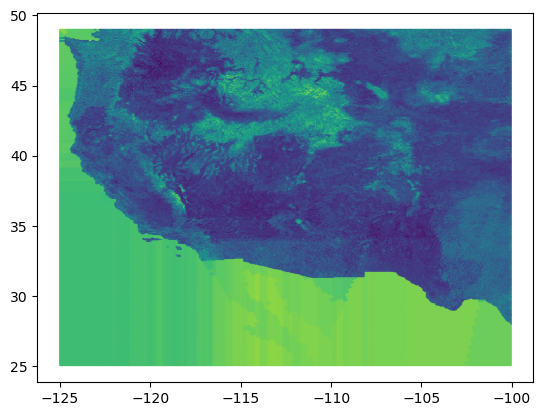

In [10]:
plt.scatter(data["lon"].values, 
                data["lat"].values, 
                label='Predicted SWE', 
                c=data['predicted_swe'], 
                cmap='viridis', 
                s=1, 
                edgecolor='none',
               )

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0            0.0
1            0.0
2         0.0096
3            0.0
4            0.0
           ...  
572315     0.021
572316       0.0
572317       0.0
572318       0.0
572319    0.0014
Name: SWE, Length: 572320, dtype: object

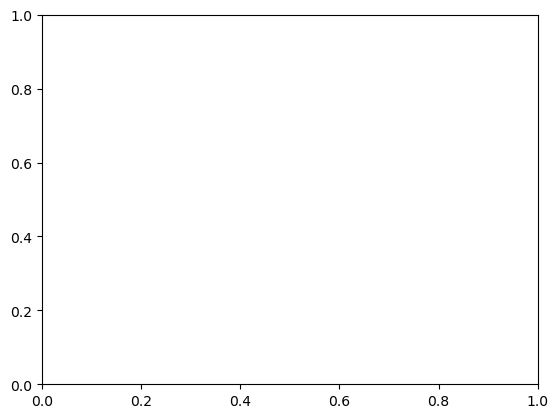

In [14]:
plt.scatter(data_UCLA["lon"].values, 
                data_UCLA["lat"].values, 
                label='SWE', 
                c=data_UCLA['SWE'], 
                cmap='viridis', 
                s=1, 
                edgecolor='none',
               )

In [12]:
data_UCLA

,date,lat,lon,SWE
0,2017-01-01,38.740,-119.744,0.0
1,2017-01-01,38.740,-119.708,0.0
2,2017-01-01,38.740,-119.672,0.0096
3,2017-01-01,38.740,-119.636,0.0
4,2017-01-01,38.740,-119.600,0.0
...,...,...,...,...
572315,2018-12-31,37.768,-118.916,0.021
572316,2018-12-31,37.768,-118.880,0.0
572317,2018-12-31,37.768,-118.844,0.0
572318,2018-12-31,37.768,-118.808,0.0


In [1]:
def convert_csvs_to_images_simple():
    """
    Convert CSV data to simple scatter plot images for predicted SWE.

    Returns:
        None
    """
    selected_date = datetime.strptime(test_start_date, "%Y-%m-%d")
    var_name = "predicted_swe"
    test_csv = f"{homedir}/gridmet_test_run/test_data_predicted.csv"
    result_var_df = pd.read_csv(test_csv)
    result_var_df.replace('--', pd.NA, inplace=True)
    result_var_df.dropna(inplace=True)
    result_var_df[var_name] = pd.to_numeric(result_var_df[var_name], errors='coerce')
    
    colormaplist, value_ranges = create_color_maps_with_value_range(result_var_df[var_name], fixed_value_ranges)

    # Create a scatter plot
    plt.scatter(result_var_df["lon"].values, 
                result_var_df["lat"].values, 
                label='Predicted SWE', 
                c=result_var_df['predicted_swe'], 
                cmap='viridis', 
                s=1, 
                edgecolor='none',
               )

    # Add a colorbar
    cbar = plt.colorbar()
    cbar.set_label('Predicted SWE')  # Label for the colorbar
    
    # Add labels and a legend
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'SWE Prediction Map {test_start_date}')
    plt.legend()

    res_png_path = f"{work_dir}/testing_output/{str(selected_date.year)}_{var_name}_{test_start_date}.png"
    plt.savefig(res_png_path)
    print(f"test image is saved at {res_png_path}")
    plt.close()

In [3]:
csv_output_file = '/home/ubuntu/gridmet_test_run/test_data_predicted.csv'
csv_WUSUCLAswe_file = '/home/ubuntu/gridmet_test_run/SWE_testingCells_2017and2018.csv'

In [4]:
data = pd.read_csv(csv_output_file)
data['predicted_swe'].fillna(0, inplace=True)

data_UCLA = pd.read_csv(csv_WUSUCLAswe_file)

/tmp/ipykernel_103096/3983687106.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_UCLA = pd.read_csv(csv_WUSUCLAswe_file)


In [7]:
m = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
                projection='merc', resolution='i')
x, y = m(data['lon'].values, data['lat'].values)


NameError: name 'Basemap' is not defined

In [ ]:
def convert_csvs_to_images():
    """
    Convert CSV data to images with color-coded SWE predictions.

    Returns:
        None
    """
    global fixed_value_ranges
    data = pd.read_csv(f"{homedir}/gridmet_test_run/test_data_predicted.csv")
    print("statistic of predicted_swe: ", data['predicted_swe'].describe())
    data['predicted_swe'].fillna(0, inplace=True)
    
    for column in data.columns:
        column_data = data[column]
        print(column_data.describe())
    
    # Create a figure with a white background
    fig = plt.figure(facecolor='white')

    lon_min, lon_max = -125, -100
    lat_min, lat_max = 25, 49.5

    m = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
                projection='merc', resolution='i')

    x, y = m(data['lon'].values, data['lat'].values)
    print(data.columns)

    color_mapping, value_ranges = create_color_maps_with_value_range(data["predicted_swe"], fixed_value_ranges)
    
    # Plot the data using the custom colormap
    plt.scatter(x, y, c=color_mapping, cmap=custom_cmap, s=30, edgecolors='none', alpha=0.7)
    
    # Draw coastlines and other map features
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    reference_date = datetime(1900, 1, 1)
    day_value = day_index
    
    result_date = reference_date + timedelta(days=day_value)
    today = result_date.strftime("%Y-%m-%d")
    timestamp_string = result_date.strftime("%Y-%m-%d")
    
    # Add a title
    plt.title(f'Predicted SWE in the Western US - {today}', pad=20)

    # Add labels for latitude and longitude on x and y axes with smaller font size
    plt.xlabel('Longitude', fontsize=6)
    plt.ylabel('Latitude', fontsize=6)

    # Add longitude values to the x-axis and adjust font size
    x_ticks_labels = np.arange(lon_min, lon_max + 5, 5)
    x_tick_labels_str = [f"{lon:.1f}°W" if lon < 0 else f"{lon:.1f}°E" for lon in x_ticks_labels]
    plt.xticks(*m(x_ticks_labels, [lat_min] * len(x_ticks_labels)), fontsize=6)
    plt.gca().set_xticklabels(x_tick_labels_str)

    # Add latitude values to the y-axis and adjust font size
    y_ticks_labels = np.arange(lat_min, lat_max + 5, 5)
    y_tick_labels_str = [f"{lat:.1f}°N" if lat >= 0 else f"{abs(lat):.1f}°S" for lat in y_ticks_labels]
    plt.yticks(*m([lon_min] * len(y_ticks_labels), y_ticks_labels), fontsize=6)
    plt.gca().set_yticklabels(y_tick_labels_str)

    # Convert map coordinates to latitude and longitude for y-axis labels
    y_tick_positions = np.linspace(lat_min, lat_max, len(y_ticks_labels))
    y_tick_positions_map_x, y_tick_positions_map_y = lat_lon_to_map_coordinates([lon_min] * len(y_ticks_labels), y_tick_positions, m)
    y_tick_positions_lat, _ = m(y_tick_positions_map_x, y_tick_positions_map_y, inverse=True)
    y_tick_positions_lat_str = [f"{lat:.1f}°N" if lat >= 0 else f"{abs(lat):.1f}°S" for lat in y_tick_positions_lat]
    plt.yticks(y_tick_positions_map_y, y_tick_positions_lat_str, fontsize=6)

    # Create custom legend elements using the same colormap
    legend_elements = [Patch(color=colors[i], label=f"{value_ranges[i]} - {value_ranges[i+1]-1}" if i < len(value_ranges) - 1 else f"> {value_ranges[-1]}") for i in range(len(value_ranges))]

    # Create the legend outside the map
    legend = plt.legend(handles=legend_elements, loc='upper left', title='Legend', fontsize=8)
    legend.set_bbox_to_anchor((1.01, 1)) 

    # Remove the color bar
    #plt.colorbar().remove()

    plt.text(0.98, 0.02, 'Copyright © SWE Wormhole Team',
             horizontalalignment='right', verticalalignment='bottom',
             transform=plt.gcf().transFigure, fontsize=6, color='black')

    # Set the aspect ratio to 'equal' to keep the plot at the center
    plt.gca().set_aspect('equal', adjustable='box')

    # Adjust the bottom and top margins to create more white space between the title and the plot
    plt.subplots_adjust(bottom=0.15, right=0.80)  # Adjust right margin to accommodate the legend
    # Show the plot or save it to a file
    new_plot_path = f'{homedir}/gridmet_test_run/predicted_swe-{test_start_date}.png'
    print(f"The new plot is saved to {new_plot_path}")
    plt.savefig(new_plot_path)
    # plt.show()  # Uncomment this line if you want to display the plot directly instead of saving it to a file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import numpy as np
import uuid
from snowcast_utils import day_index
import matplotlib.colors as mcolors

# Import utility functions and variables from 'snowcast_utils'
from snowcast_utils import homedir, work_dir, test_start_date

# Define a custom colormap with specified colors and ranges
colors = [
    (0.8627, 0.8627, 0.8627),  # #DCDCDC - 0 - 1
    (0.8627, 1.0000, 1.0000),  # #DCFFFF - 1 - 2
    (0.6000, 1.0000, 1.0000),  # #99FFFF - 2 - 4
    (0.5569, 0.8235, 1.0000),  # #8ED2FF - 4 - 6
    (0.4509, 0.6196, 0.8745),  # #739EDF - 6 - 8
    (0.4157, 0.4706, 1.0000),  # #6A78FF - 8 - 10
    (0.4235, 0.2784, 1.0000),  # #6C47FF - 10 - 12
    (0.5529, 0.0980, 1.0000),  # #8D19FF - 12 - 14
    (0.7333, 0.0000, 0.9176),  # #BB00EA - 14 - 16
    (0.8392, 0.0000, 0.7490),  # #D600BF - 16 - 18
    (0.7569, 0.0039, 0.4549),  # #C10074 - 18 - 20
    (0.6784, 0.0000, 0.1961),  # #AD0032 - 20 - 30
    (0.5020, 0.0000, 0.0000)   # #800000 - > 30
]

cmap_name = 'custom_snow_colormap'
custom_cmap = mcolors.ListedColormap(colors)

# Define the lat_lon_to_map_coordinates function
def lat_lon_to_map_coordinates(lon, lat, m):
    """
    Convert latitude and longitude coordinates to map coordinates.

    Args:
        lon (float or array-like): Longitude coordinate(s).
        lat (float or array-like): Latitude coordinate(s).
        m (Basemap): Basemap object representing the map projection.

    Returns:
        tuple: Tuple containing the converted map coordinates (x, y).
    """
    x, y = m(lon, lat)
    return x, y

# Define value ranges for color mapping
fixed_value_ranges = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30]

def create_color_maps_with_value_range(df_col, value_ranges=None):
    """
    Create a colormap for value ranges and map data values to colors.

    Args:
        df_col (pd.Series): A Pandas Series containing data values.
        value_ranges (list, optional): A list of value ranges for color mapping.
            If not provided, the ranges will be determined automatically.

    Returns:
        tuple: Tuple containing the color mapping and the updated value ranges.
    """
    new_value_ranges = value_ranges
    if value_ranges is None:
        max_value = df_col.max()
        min_value = df_col.min()
        if min_value < 0:
            min_value = 0
        step_size = (max_value - min_value) / 12

        # Create 10 periods
        new_value_ranges = [min_value + i * step_size for i in range(12)]
    
    print("new_value_ranges: ", new_value_ranges)
  
    # Define a custom function to map data values to colors
    def map_value_to_color(value):
        # Iterate through the value ranges to find the appropriate color index
        for i, range_max in enumerate(new_value_ranges):
            if value <= range_max:
                return colors[i]

        # If the value is greater than the largest range, return the last color
        return colors[-1]

    # Map predicted_swe values to colors using the custom function
    color_mapping = [map_value_to_color(value) for value in df_col.values]
    return color_mapping, new_value_ranges

def convert_csvs_to_images():
    """
    Convert CSV data to images with color-coded SWE predictions.

    Returns:
        None
    """
    global fixed_value_ranges
    data = pd.read_csv(f"{homedir}/gridmet_test_run/test_data_predicted.csv")
    print("statistic of predicted_swe: ", data['predicted_swe'].describe())
    data['predicted_swe'].fillna(0, inplace=True)
    
    for column in data.columns:
        column_data = data[column]
        print(column_data.describe())
    
    # Create a figure with a white background
    fig = plt.figure(facecolor='white')

    lon_min, lon_max = -125, -100
    lat_min, lat_max = 25, 49.5

    m = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
                projection='merc', resolution='i')

    x, y = m(data['lon'].values, data['lat'].values)
    print(data.columns)

    color_mapping, value_ranges = create_color_maps_with_value_range(data["predicted_swe"], fixed_value_ranges)
    
    # Plot the data using the custom colormap
    plt.scatter(x, y, c=color_mapping, cmap=custom_cmap, s=30, edgecolors='none', alpha=0.7)
    
    # Draw coastlines and other map features
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    reference_date = datetime(1900, 1, 1)
    day_value = day_index
    
    result_date = reference_date + timedelta(days=day_value)
    today = result_date.strftime("%Y-%m-%d")
    timestamp_string = result_date.strftime("%Y-%m-%d")
    
    # Add a title
    plt.title(f'Predicted SWE in the Western US - {today}', pad=20)

    # Add labels for latitude and longitude on x and y axes with smaller font size
    plt.xlabel('Longitude', fontsize=6)
    plt.ylabel('Latitude', fontsize=6)

    # Add longitude values to the x-axis and adjust font size
    x_ticks_labels = np.arange(lon_min, lon_max + 5, 5)
    x_tick_labels_str = [f"{lon:.1f}°W" if lon < 0 else f"{lon:.1f}°E" for lon in x_ticks_labels]
    plt.xticks(*m(x_ticks_labels, [lat_min] * len(x_ticks_labels)), fontsize=6)
    plt.gca().set_xticklabels(x_tick_labels_str)

    # Add latitude values to the y-axis and adjust font size
    y_ticks_labels = np.arange(lat_min, lat_max + 5, 5)
    y_tick_labels_str = [f"{lat:.1f}°N" if lat >= 0 else f"{abs(lat):.1f}°S" for lat in y_ticks_labels]
    plt.yticks(*m([lon_min] * len(y_ticks_labels), y_ticks_labels), fontsize=6)
    plt.gca().set_yticklabels(y_tick_labels_str)

    # Convert map coordinates to latitude and longitude for y-axis labels
    y_tick_positions = np.linspace(lat_min, lat_max, len(y_ticks_labels))
    y_tick_positions_map_x, y_tick_positions_map_y = lat_lon_to_map_coordinates([lon_min] * len(y_ticks_labels), y_tick_positions, m)
    y_tick_positions_lat, _ = m(y_tick_positions_map_x, y_tick_positions_map_y, inverse=True)
    y_tick_positions_lat_str = [f"{lat:.1f}°N" if lat >= 0 else f"{abs(lat):.1f}°S" for lat in y_tick_positions_lat]
    plt.yticks(y_tick_positions_map_y, y_tick_positions_lat_str, fontsize=6)

    # Create custom legend elements using the same colormap
    legend_elements = [Patch(color=colors[i], label=f"{value_ranges[i]} - {value_ranges[i+1]-1}" if i < len(value_ranges) - 1 else f"> {value_ranges[-1]}") for i in range(len(value_ranges))]

    # Create the legend outside the map
    legend = plt.legend(handles=legend_elements, loc='upper left', title='Legend', fontsize=8)
    legend.set_bbox_to_anchor((1.01, 1)) 

    # Remove the color bar
    #plt.colorbar().remove()

    plt.text(0.98, 0.02, 'Copyright © SWE Wormhole Team',
             horizontalalignment='right', verticalalignment='bottom',
             transform=plt.gcf().transFigure, fontsize=6, color='black')

    # Set the aspect ratio to 'equal' to keep the plot at the center
    plt.gca().set_aspect('equal', adjustable='box')

    # Adjust the bottom and top margins to create more white space between the title and the plot
    plt.subplots_adjust(bottom=0.15, right=0.80)  # Adjust right margin to accommodate the legend
    # Show the plot or save it to a file
    new_plot_path = f'{homedir}/gridmet_test_run/predicted_swe-{test_start_date}.png'
    print(f"The new plot is saved to {new_plot_path}")
    plt.savefig(new_plot_path)
    # plt.show()  # Uncomment this line if you want to display the plot directly instead of saving it to a file

def convert_csvs_to_images_simple():
    """
    Convert CSV data to simple scatter plot images for predicted SWE.

    Returns:
        None
    """
    selected_date = datetime.strptime(test_start_date, "%Y-%m-%d")
    var_name = "predicted_swe"
    test_csv = f"{homedir}/gridmet_test_run/test_data_predicted.csv"
    result_var_df = pd.read_csv(test_csv)
    result_var_df.replace('--', pd.NA, inplace=True)
    result_var_df.dropna(inplace=True)
    result_var_df[var_name] = pd.to_numeric(result_var_df[var_name], errors='coerce')
    
    colormaplist, value_ranges = create_color_maps_with_value_range(result_var_df[var_name], fixed_value_ranges)

    # Create a scatter plot
    plt.scatter(result_var_df["lon"].values, 
                result_var_df["lat"].values, 
                label='Predicted SWE', 
                c=result_var_df['predicted_swe'], 
                cmap='viridis', 
                s=1, 
                edgecolor='none',
               )

    # Add a colorbar
    cbar = plt.colorbar()
    cbar.set_label('Predicted SWE')  # Label for the colorbar
    
    # Add labels and a legend
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'SWE Prediction Map {test_start_date}')
    plt.legend()

    res_png_path = f"{work_dir}/testing_output/{str(selected_date.year)}_{var_name}_{test_start_date}.png"
    plt.savefig(res_png_path)
    print(f"test image is saved at {res_png_path}")
    plt.close()

# Uncomment the function call you want to use:
# convert_csvs_to_images()
convert_csvs_to_images_simple()

In [67]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [106]:
base_direc = '/home/ubuntu/gridmet_test_run/'
df_UA = pd.read_csv(base_direc+'ua_single_csv_file.csv')
df_testing = pd.read_csv(base_direc+'testing_all_ready-Copy1.csv_hackweek_subset_unique_location.csv')

reff_lon = df_testing.Longitude
reff_lat = df_testing.Latitude

In [70]:
# add fields
df_UA['newLat'] = None
df_UA['newLon'] = None
df_UA['dist'] = None

# initialize checker to make sure we don't repeat values in the loop
lat_saver = 0
lon_saver = 0

# loop through the lat/lon values in the UA dataset
for latt,lonn in zip(df_UA.latitude,df_UA.longitude):
    
    lat_saver = latt
    lon_saver = lonn

    row_indices = df_UA[(df_UA['latitude'] == latt) & (df_UA['longitude'] == lonn)].index

    dist = np.sqrt(((reff_lon-lonn)**2)+((reff_lat-latt)**2))
    dist_idx = np.argmin(dist)

    df_UA.loc[row_indices, 'newLat'] = reff_lat[dist_idx]
    df_UA.loc[row_indices, 'newLon'] = reff_lon[dist_idx]
    df_UA.loc[row_indices, 'dist'] = np.min(dist)

In [99]:
keep_indices = []
# loop through the lat/lon values in the UA dataset
for latt,lonn in zip(df_UA.newLat,df_UA.newLon):
    row_indices_01 = df_UA[(df_UA['newLat'] == latt) & (df_UA['newLon'] == lonn)].index
    dist = df_UA.loc[row_indices_01]['dist']
    row_indices_02 = df_UA[df_UA['dist'] == np.min(dist)].index
    
    temp = np.intersect1d(row_indices_01,row_indices_02)
    keep_indices.append(temp)

    # break
    
df_UA_subset = df_UA.loc[keep_indices[0]]

# print(np.unique(df_UA.latitude))
# print(np.unique(df_UA.longitude))

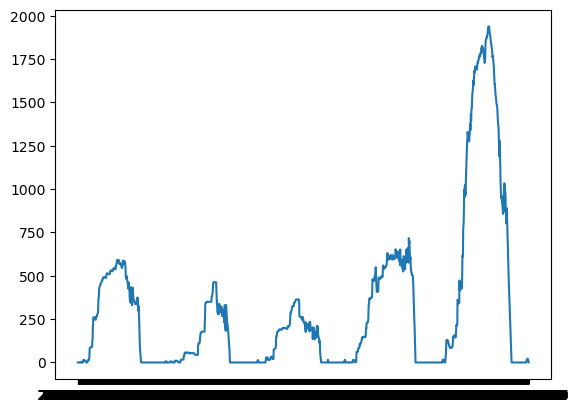

In [105]:
idxs = df_UA_subset.loc[(df_UA['newLat'] == 37.768) & (df_UA['newLon'] == -118.772)].index
plt.plot(df_UA_subset.loc[idxs]['date'],df_UA_subset.loc[idxs]['SWE_UA'])

In [103]:
df_UA

,Unnamed: 0,date,SWE_UA,Depth_UA,latitude,longitude,label,newLat,newLon,dist
0,0,2012-10-01,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.768,-118.772,0.69193
1,1,2012-10-02,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.768,-118.772,0.69193
2,2,2012-10-03,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.768,-118.772,0.69193
3,3,2012-10-04,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.768,-118.772,0.69193
4,4,2012-10-05,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.768,-118.772,0.69193
...,...,...,...,...,...,...,...,...,...,...
9125,1821,2017-09-26,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,37.768,-118.772,1.134086
9126,1822,2017-09-27,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,37.768,-118.772,1.134086
9127,1823,2017-09-28,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,37.768,-118.772,1.134086
9128,1824,2017-09-29,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,37.768,-118.772,1.134086


In [107]:
print(np.unique(df_UA.latitude))
print(np.unique(df_UA.longitude))

[36.66095653 37.02759074 37.07777577 37.43527394 37.78397333]
[-119.40616437 -119.32531599 -118.72344475 -118.52581539 -107.08127867]


In [72]:
df_UA

,Unnamed: 0,date,SWE_UA,Depth_UA,latitude,longitude,label,newLat,newLon,dist
0,0,2012-10-01,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.768,-118.772,0.69193
1,1,2012-10-02,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.768,-118.772,0.69193
2,2,2012-10-03,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.768,-118.772,0.69193
3,3,2012-10-04,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.768,-118.772,0.69193
4,4,2012-10-05,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.768,-118.772,0.69193
...,...,...,...,...,...,...,...,...,...,...
9125,1821,2017-09-26,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,37.768,-118.772,1.134086
9126,1822,2017-09-27,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,37.768,-118.772,1.134086
9127,1823,2017-09-28,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,37.768,-118.772,1.134086
9128,1824,2017-09-29,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,37.768,-118.772,1.134086
